In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/innercity.xlsx")
data=pd.read_excel(path)

#Data preprocessing

In [ ]:
data.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [ ]:
df=data.drop(["cid"],axis=1)

* cid column is dropped from the data set as it is of no use for our analysis.


In [ ]:
df.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0  20150427T000000  600000       4.0       1.75          3050.0       9440.0   
1  20150317T000000  190000       2.0       1.00           670.0       3101.0   
2  20140820T000000  735000       4.0       2.75          3040.0       2415.0   
3  20141010T000000  257000       3.0       2.50          1740.0       3721.0   
4  20150218T000000  450000       2.0       1.00          1120.0       4590.0   

  ceil coast  sight condition  ...  basement  yr_built  yr_renovated zipcode  \
0    1     0    0.0         3  ...    1250.0      1966             0   98034   
1    1     0    0.0         4  ...       0.0      1948             0   98118   
2    2     1    4.0         3  ...       0.0      1966             0   98118   
3    2     0    0.0         3  ...       0.0      2009             0   98002   
4    1     0    0.0         3  ...       0.0      1924             0   98118   

       lat     long  living_measure15 lot_measure15  furnished  total_area  
0  47.7228 -122.183            2020.0        8660.0        0.0       12490  
1  47.5546 -122.274            1660.0        4100.0        0.0        3771  
2  47.5188 -122.256            2620.0        2433.0        0.0        5455  
3  47.3363 -122.213            2030.0        3794.0        0.0        5461  
4  47.5663 -122.285            1120.0        5100.0        0.0        5710  

[5 rows x 22 columns]

In [ ]:
df["dayhours"]=pd.to_datetime(df["dayhours"],format="%Y%m%dT%H%M%S")

* dayhours column data type is converted to datetime data type as it is in object format.

In [ ]:
df.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure ceil  \
0 2015-04-27  600000       4.0       1.75          3050.0       9440.0    1   
1 2015-03-17  190000       2.0       1.00           670.0       3101.0    1   
2 2014-08-20  735000       4.0       2.75          3040.0       2415.0    2   
3 2014-10-10  257000       3.0       2.50          1740.0       3721.0    2   
4 2015-02-18  450000       2.0       1.00          1120.0       4590.0    1   

  coast  sight condition  ...  basement  yr_built  yr_renovated zipcode  \
0     0    0.0         3  ...    1250.0      1966             0   98034   
1     0    0.0         4  ...       0.0      1948             0   98118   
2     1    4.0         3  ...       0.0      1966             0   98118   
3     0    0.0         3  ...       0.0      2009             0   98002   
4     0    0.0         3  ...       0.0      1924             0   98118   

       lat     long  living_measure15 lot_measure15  furnished  total_area  
0  47.7228 -122.183            2020.0        8660.0        0.0       12490  
1  47.5546 -122.274            1660.0        4100.0        0.0        3771  
2  47.5188 -122.256            2620.0        2433.0        0.0        5455  
3  47.3363 -122.213            2030.0        3794.0        0.0        5461  
4  47.5663 -122.285            1120.0        5100.0        0.0        5710  

[5 rows x 22 columns]

In [ ]:
df=df.sort_values(by="dayhours",ascending=True)

* Data set is sorted into ascending order by using dayhours column.

In [ ]:
df.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
17176 2014-05-02  435000       4.0       1.00          1450.0       8800.0   
16626 2014-05-02  257950       3.0       1.75          1370.0       5858.0   
15422 2014-05-02  335000       3.0       2.25          1580.0      16215.0   
6337  2014-05-02  445700       3.0       2.50          1270.0       1180.0   
13352 2014-05-02  470000       5.0       2.50          2210.0       9655.0   

      ceil coast  sight condition  ...  basement  yr_built  yr_renovated  \
17176    1     0    0.0         4  ...       0.0      1954             0   
16626    1     0    0.0         3  ...       0.0      1987             0   
15422    1     0    0.0         4  ...       0.0      1978             0   
6337     3     0    0.0         3  ...       0.0      2001             0   
13352    1     0    0.0         3  ...     750.0      1976             0   

      zipcode      lat     long  living_measure15 lot_measure15  furnished  \
17176   98006  47.5746 -122.135            1260.0        8942.0        0.0   
16626   98198  47.3815 -122.313            1400.0        7500.0        0.0   
15422   98024  47.5643 -121.897            1450.0       16215.0        0.0   
6337    98107  47.6697 -122.392            1320.0        1180.0        0.0   
13352   98011  47.7698 -122.222            2080.0        8633.0        0.0   

       total_area  
17176       10250  
16626        7228  
15422       17795  
6337         2450  
13352       11865  

[5 rows x 22 columns]

In [ ]:
df.tail()

dayhours    price  room_bed  room_bath  living_measure  lot_measure  \
13258 2015-05-14   359000       2.0       2.75          1370.0       1140.0   
11681 2015-05-14  1700000       5.0       3.00          3320.0       5354.0   
8433  2015-05-15   450000       5.0       2.00          1870.0       7344.0   
651   2015-05-24   445500       2.0       1.75          1390.0       6670.0   
15121 2015-05-27  1310000       4.0       2.25          3750.0       5000.0   

      ceil coast  sight condition  ...  basement  yr_built  yr_renovated  \
13258    2     0    0.0         3  ...     290.0      2009             0   
11681    2     0    0.0         3  ...       0.0      2004             0   
8433   1.5     0    0.0         3  ...       0.0      1960             0   
651      1     0    0.0         3  ...     670.0      1941             0   
15121    2     0    0.0         5  ...    1310.0      1924             0   

      zipcode      lat     long  living_measure15 lot_measure15  furnished  \
13258   98133  47.7052 -122.343            1370.0        1090.0        0.0   
11681   98103  47.6542 -122.331            2330.0        4040.0        1.0   
8433    98007  47.5951 -122.144            1870.0        7650.0        0.0   
651     98115  47.6914 -122.308             920.0        6380.0        0.0   
15121   98115  47.6747 -122.303            2170.0        4590.0        0.0   

       total_area  
13258        2510  
11681        8674  
8433         9214  
651          8060  
15121        8750  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 17176 to 15121
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   room_bed          21505 non-null  float64       
 3   room_bath         21505 non-null  float64       
 4   living_measure    21596 non-null  float64       
 5   lot_measure       21571 non-null  float64       
 6   ceil              21571 non-null  object        
 7   coast             21612 non-null  object        
 8   sight             21556 non-null  float64       
 9   condition         21556 non-null  object        
 10  quality           21612 non-null  float64       
 11  ceil_measure      21612 non-null  float64       
 12  basement          21612 non-null  float64       
 13  yr_built          21612 non-null  object        
 14  yr_renovated      

In [ ]:
df["room_bed"].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

* room_bed column has a value of 33, which is a inconsistency and is changed into null value by using replace function and np.NaN

In [ ]:
df["room_bed"]=df["room_bed"].replace(33,np.NaN)

In [ ]:
df["ceil"].value_counts()

1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64

* Columns like ceil,coast, condition, yr_built and long also had some inconsistencies, which are replaced to null values for our analysis purposes.

In [ ]:
df["ceil"]=df["ceil"].replace("$",np.NaN)

In [ ]:
df["coast"].value_counts()

0    21421
1      161
$       30
Name: coast, dtype: int64

In [ ]:
df["coast"]=df["coast"].replace("$",np.NaN)

In [ ]:
df["condition"].value_counts()

3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64

In [ ]:
df["condition"]=df["condition"].replace("$",np.NaN)

In [ ]:
df["yr_built"].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1901     29
1902     27
1935     24
1934     21
$        14
Name: yr_built, Length: 117, dtype: int64

In [ ]:
df["yr_built"]=df["yr_built"].replace("$",np.NaN)

In [ ]:
df["long"].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.484      1
-122.496      1
-121.797      1
-121.733      1
-122.441      1
Name: long, Length: 753, dtype: int64

In [ ]:
df["long"]=df["long"].replace("$",np.NaN)

In [ ]:
df["living_measure"]=df.apply(lambda row: row["total_area"]-row["lot_measure"] if pd.isna(row["living_measure"]) else row["living_measure"],axis=1)

In [ ]:
df["lot_measure"]=df.apply(lambda row: row["total_area"]-row["living_measure"] if pd.isna(row["lot_measure"]) else row["lot_measure"],axis=1)

In [ ]:
df["total_area"]=df["total_area"].replace("$",np.NaN)

In [ ]:
df["total_area"]=df.apply(lambda row: row["living_measure"]+row["lot_measure"] if pd.isna(row["total_area"]) else row["total_area"],axis=1)

#Missing values:
* Missing values are identified in most of the variables in the data set.
* Identified missing values are in less percentage so i choose to impute them.
* In the data set total_area variable is the sum of living_measure and lot_measure variable.
* Missing values in the variables living_measure, lot_measure and total_area are imputed using the formula and lamda function.
* Missing values in the other variables are imputed using median values of that particular variable median values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 17176 to 15121
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   room_bed          21504 non-null  float64       
 3   room_bath         21505 non-null  float64       
 4   living_measure    21613 non-null  float64       
 5   lot_measure       21613 non-null  float64       
 6   ceil              21541 non-null  float64       
 7   coast             21582 non-null  float64       
 8   sight             21556 non-null  float64       
 9   condition         21528 non-null  float64       
 10  quality           21612 non-null  float64       
 11  ceil_measure      21612 non-null  float64       
 12  basement          21612 non-null  float64       
 13  yr_built          21598 non-null  float64       
 14  yr_renovated      

In [ ]:
data1=df.drop(["dayhours"],axis=1)
data2=df["dayhours"]

In [ ]:
for column in data1.columns:
  median_value=data1[column].median()
  data1[column].fillna(median_value,inplace=True)


In [ ]:
df=pd.concat([data2,data1],axis=1,join="inner")
df.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
17176 2014-05-02  435000       4.0       1.00          1450.0       8800.0   
16626 2014-05-02  257950       3.0       1.75          1370.0       5858.0   
15422 2014-05-02  335000       3.0       2.25          1580.0      16215.0   
6337  2014-05-02  445700       3.0       2.50          1270.0       1180.0   
13352 2014-05-02  470000       5.0       2.50          2210.0       9655.0   

       ceil  coast  sight  condition  ...  basement  yr_built  yr_renovated  \
17176   1.0    0.0    0.0        4.0  ...       0.0    1954.0             0   
16626   1.0    0.0    0.0        3.0  ...       0.0    1987.0             0   
15422   1.0    0.0    0.0        4.0  ...       0.0    1978.0             0   
6337    3.0    0.0    0.0        3.0  ...       0.0    2001.0             0   
13352   1.0    0.0    0.0        3.0  ...     750.0    1976.0             0   

       zipcode      lat     long  living_measure15  lot_measure15  furnished  \
17176    98006  47.5746 -122.135            1260.0         8942.0        0.0   
16626    98198  47.3815 -122.313            1400.0         7500.0        0.0   
15422    98024  47.5643 -121.897            1450.0        16215.0        0.0   
6337     98107  47.6697 -122.392            1320.0         1180.0        0.0   
13352    98011  47.7698 -122.222            2080.0         8633.0        0.0   

       total_area  
17176     10250.0  
16626      7228.0  
15422     17795.0  
6337       2450.0  
13352     11865.0  

[5 rows x 22 columns]

<Figure size 3000x2500 with 0 Axes>

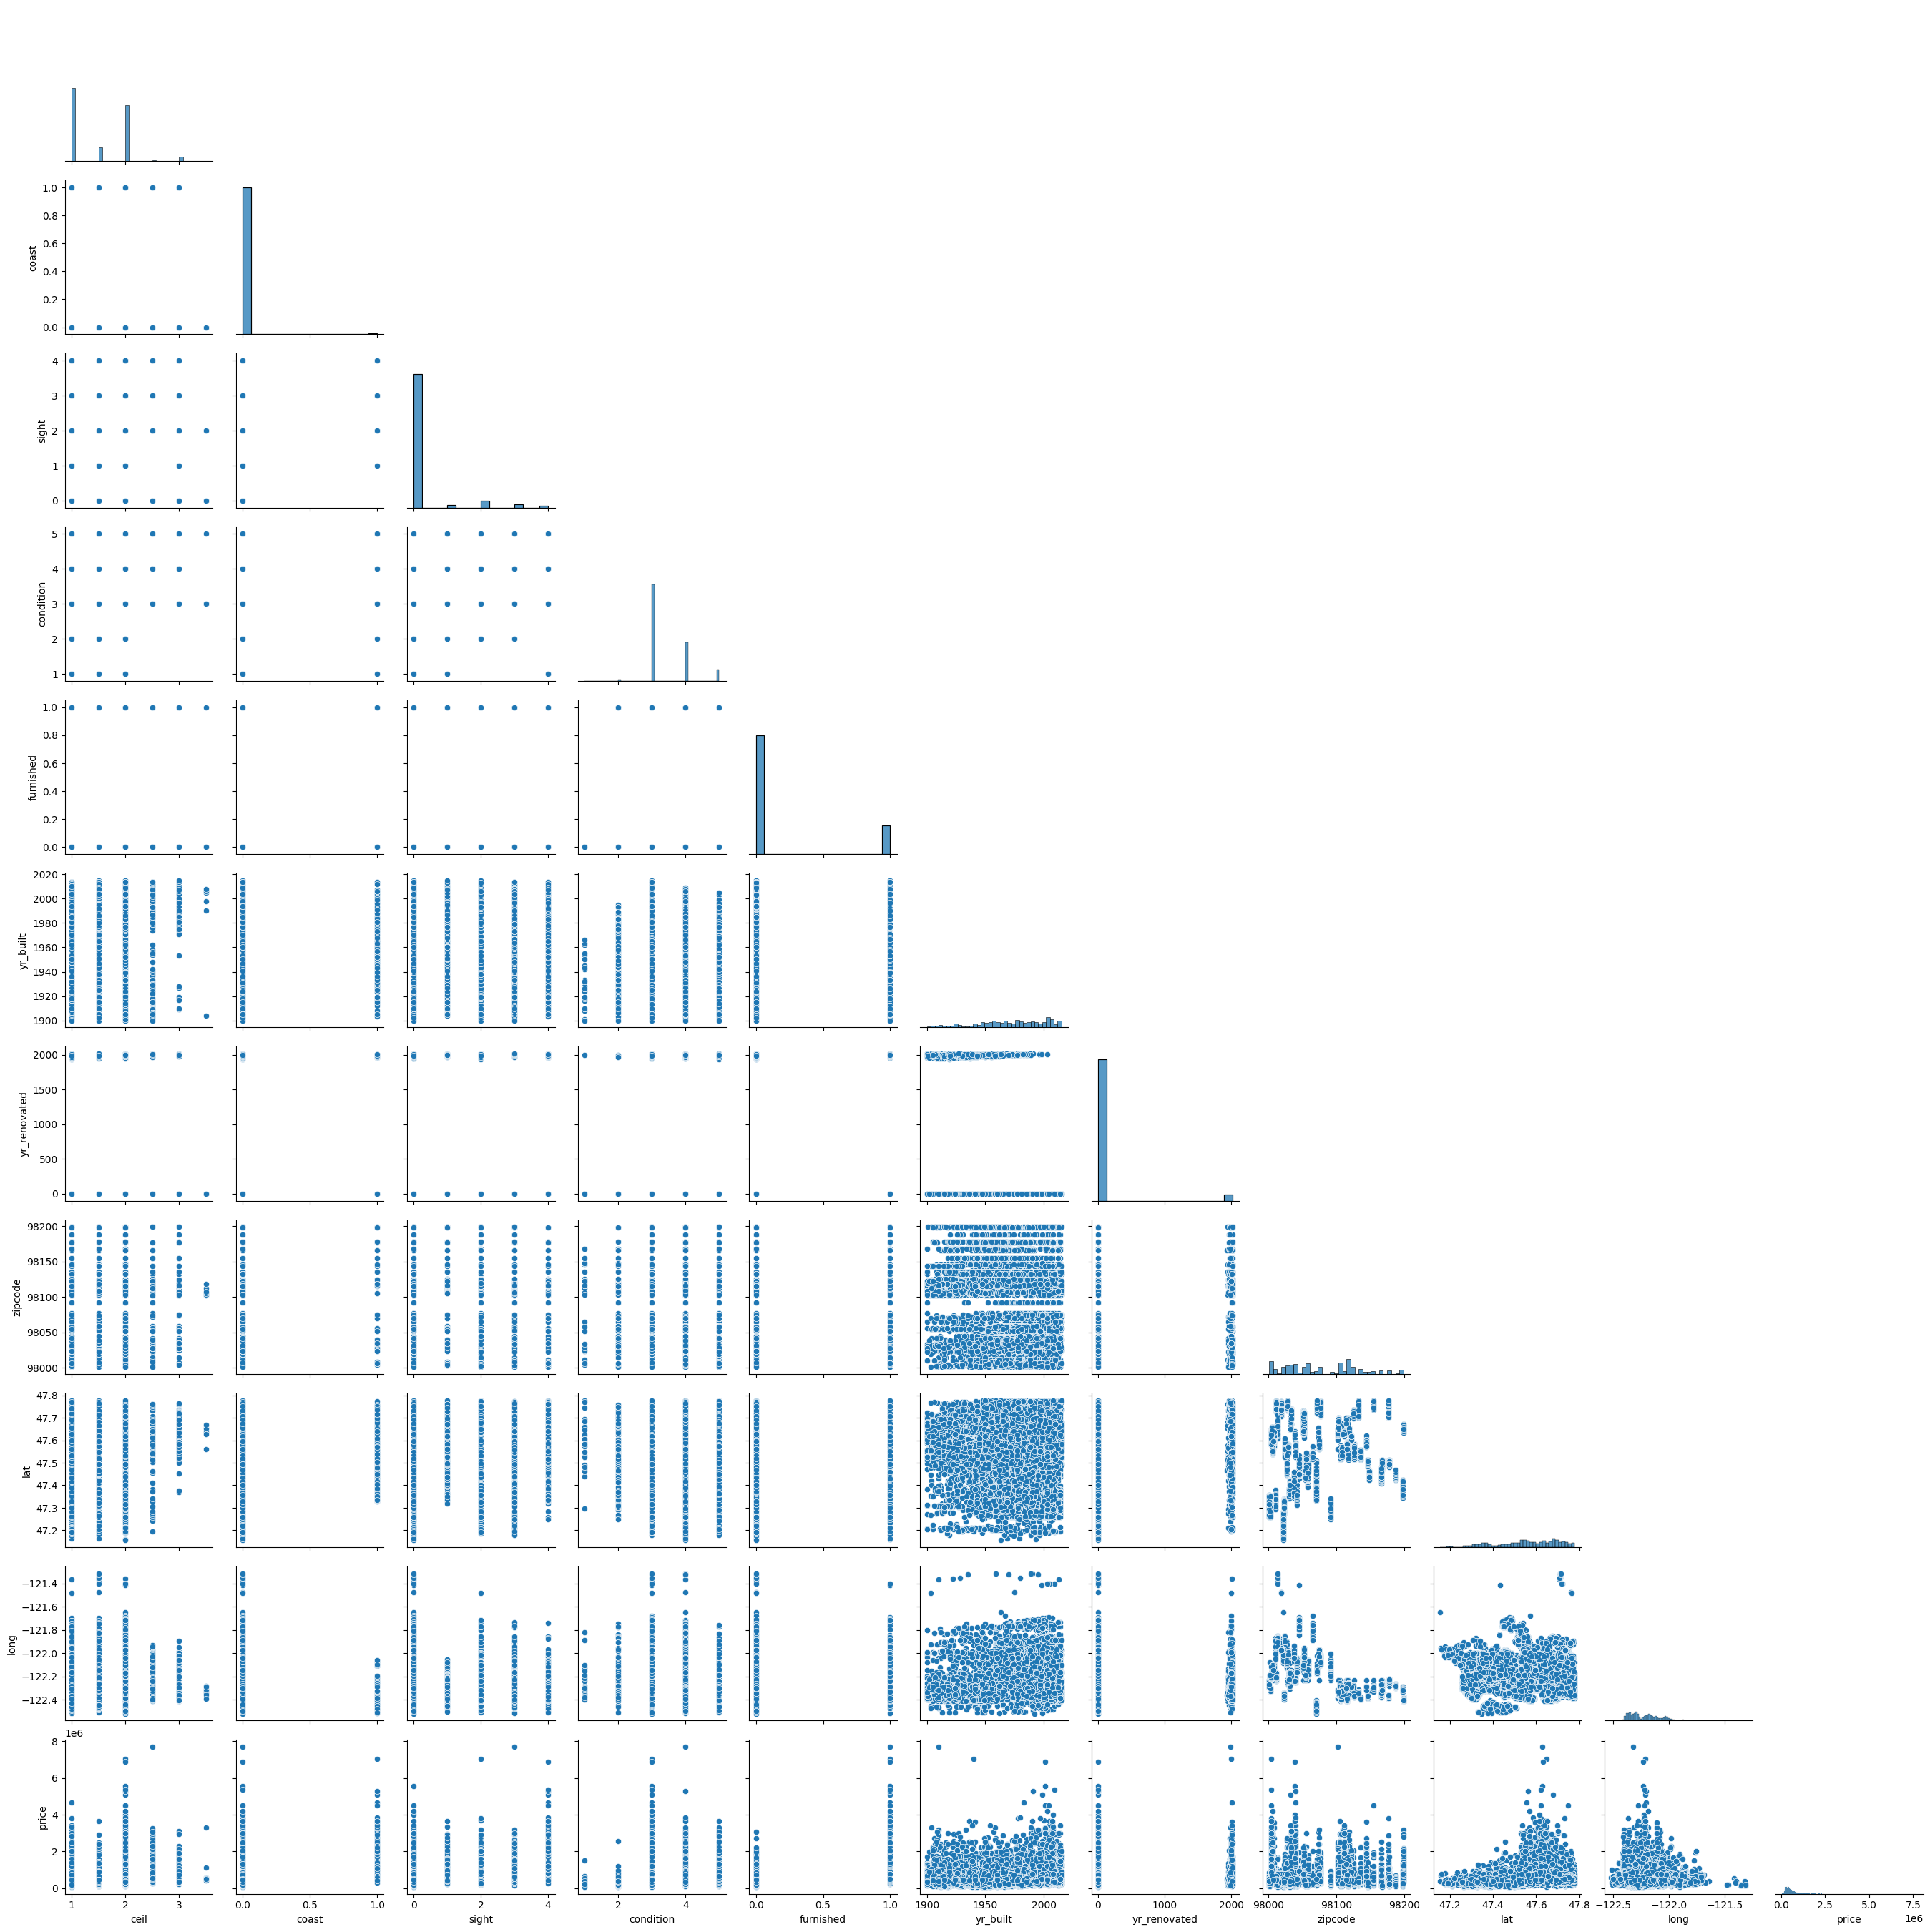

In [ ]:
plt.figure(figsize=(30,25))
sns.pairplot(data=df,vars=["ceil","coast","sight",
                                 "condition","furnished","yr_built","yr_renovated","zipcode","lat","long","price"],corner=True);

In [ ]:
df["coast"]=df["coast"].astype("category")
df["sight"]=df["sight"].astype("category")
df["condition"]=df["condition"].astype("category")
df["furnished"]=df["furnished"].astype("category")
df["ceil"]=df["ceil"].astype("category")

* Variables like ceil,coast,sight,condition and furnished are converted into categorical variables as they are all discrete.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 17176 to 15121
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   room_bed          21613 non-null  float64       
 3   room_bath         21613 non-null  float64       
 4   living_measure    21613 non-null  float64       
 5   lot_measure       21613 non-null  float64       
 6   ceil              21613 non-null  category      
 7   coast             21613 non-null  category      
 8   sight             21613 non-null  category      
 9   condition         21613 non-null  category      
 10  quality           21613 non-null  float64       
 11  ceil_measure      21613 non-null  float64       
 12  basement          21613 non-null  float64       
 13  yr_built          21613 non-null  float64       
 14  yr_renovated      

In [ ]:
data_num=df.select_dtypes(["float","int64"])
data_cat=df.select_dtypes(["category"])
data_time=df.select_dtypes(["datetime64"])

In [ ]:
data_cat.head()

ceil coast sight condition furnished
17176  1.0   0.0   0.0       4.0       0.0
16626  1.0   0.0   0.0       3.0       0.0
15422  1.0   0.0   0.0       4.0       0.0
6337   3.0   0.0   0.0       3.0       0.0
13352  1.0   0.0   0.0       3.0       0.0

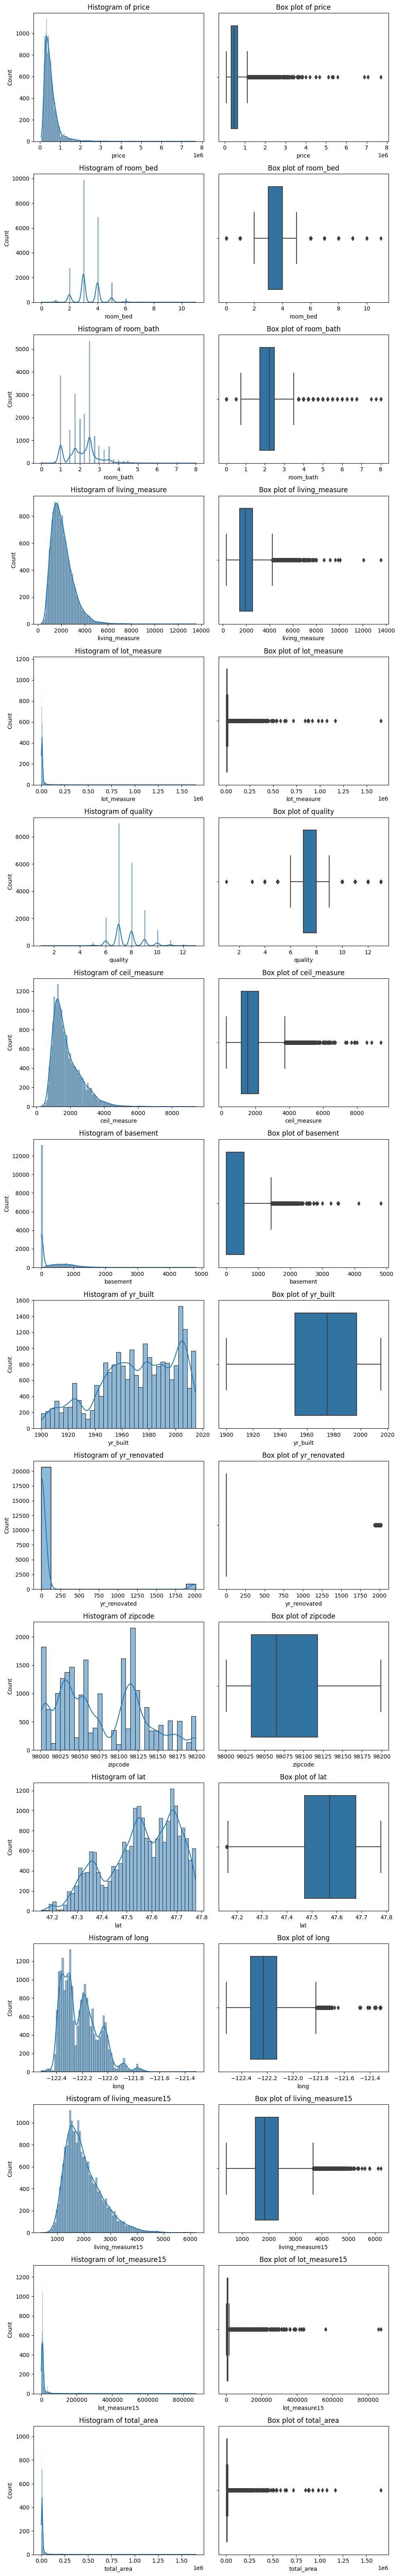

In [ ]:
fig, axes =plt.subplots(nrows=len(data_num.columns),ncols=2,figsize=(10,4*len(data_num.columns)))
for i, column in enumerate(data_num.columns):
  sns.histplot(data_num[column],kde=True,ax=axes[i,0])
  axes[i,0].set_title("Histogram of "+column)

  sns.boxplot(x=data_num[column],ax=axes[i,1])
  axes[i,1].set_title("Box plot of "+column)
plt.tight_layout()
plt.show()

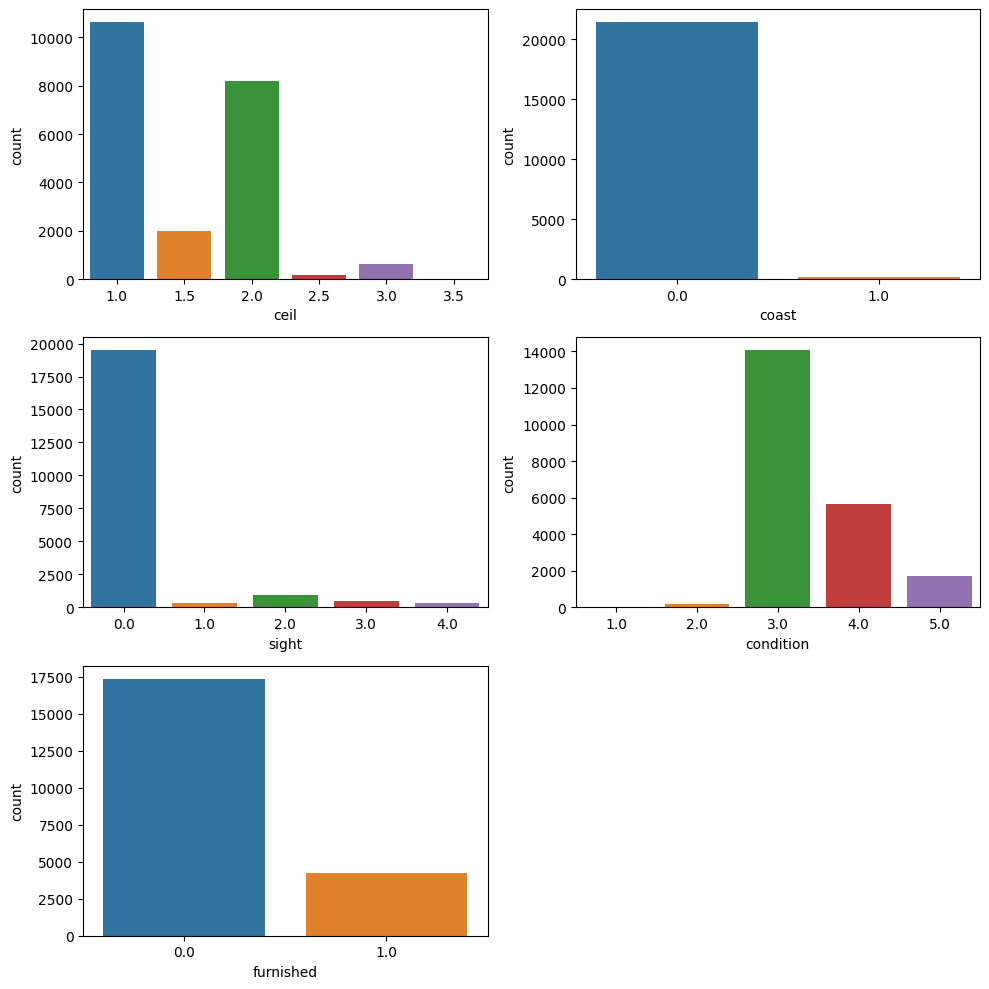

In [ ]:
plt.figure(figsize=(10,10))
feature_list=data_cat.columns
for i in range(len(feature_list)):
  plt.subplot(3,2,i+1)
  sns.countplot(x=data_cat[feature_list[i]])
  plt.tight_layout()

# Insights from univariate analysis:
* Price variable is highly righ skewed and has outliers.
* Room_bath and room_bed variables are right skewed and has outliers.
* living_measure variable is highly right skewed and has outliers.
* lot_measure variable is extremely right skewed and has outliers.
* quality variable is slightly normally distributed but has outliers on both the ends.
* ceil_measure variable is right skewed and has outliers.
* basement variable is extremely right skewed and has outliers.
* yr_build variable is left skewed.
* yr_renovated variable is right skewed and has outliers.
* living_measure15 variable is slightly right skewed and has outliers.
* lot_measure15 variable is right skewed and has outliers.
* total_area columns is highly right skewed and has outliers.
* ceil variable indicates the total floors in the house and houses which have 1 floor are more in this data followed by 2 floors.
* Coast variable indicates the houses which have a view to the waterfront and there are very less number of houses which has a view.
* sight variable indicates the number of times a house has been viewed and most of the houses in the data set are not viewed at all, followed by houses which are viewed 2 times.
* condition variable indicated the overall condition of the house and most of the houses in the data set are of rating 3 followed by 4 and 5.
* Most of the houses in the data set are not furnished.


<Axes: xlabel='dayhours', ylabel='price'>

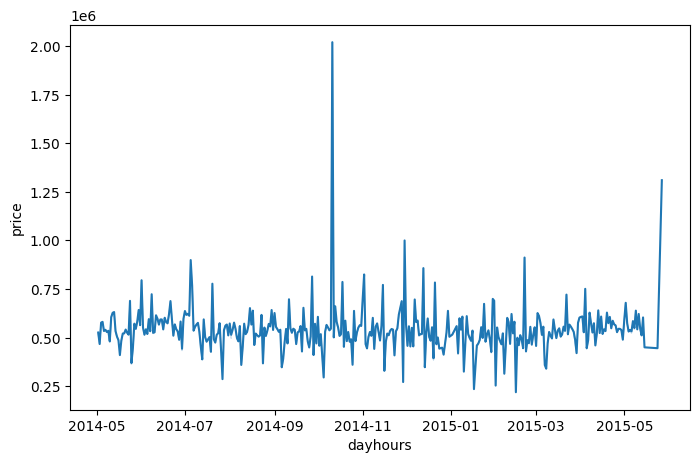

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x="dayhours",y="price",ci=False,markers=True)

* From the above line plot, there seems to be fluctuations in house prices from 2014 may to 2015 may.
* In October 2014, the price is very much high than all the other months in the year.

<Axes: xlabel='yr_built', ylabel='price'>

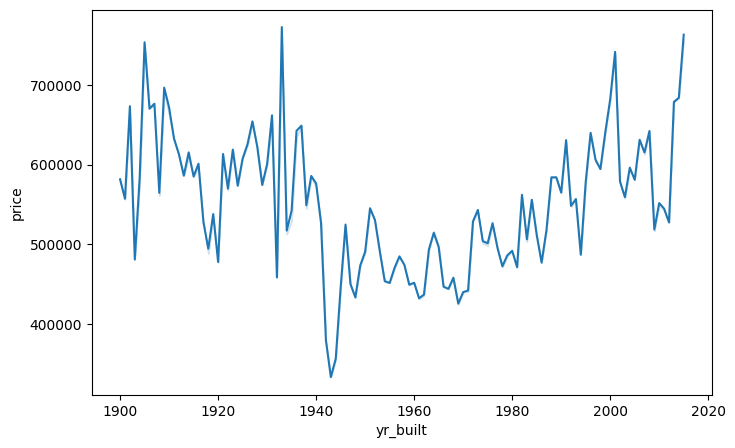

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x="yr_built",y="price",ci=False,markers=True)

* Houses which are built between 1940's to 1950's have less prices.
* Houses which are built in early 1900's are high compared to mid of 1900's
* Houses which are built recently have high prices.

<Figure size 3000x2500 with 0 Axes>

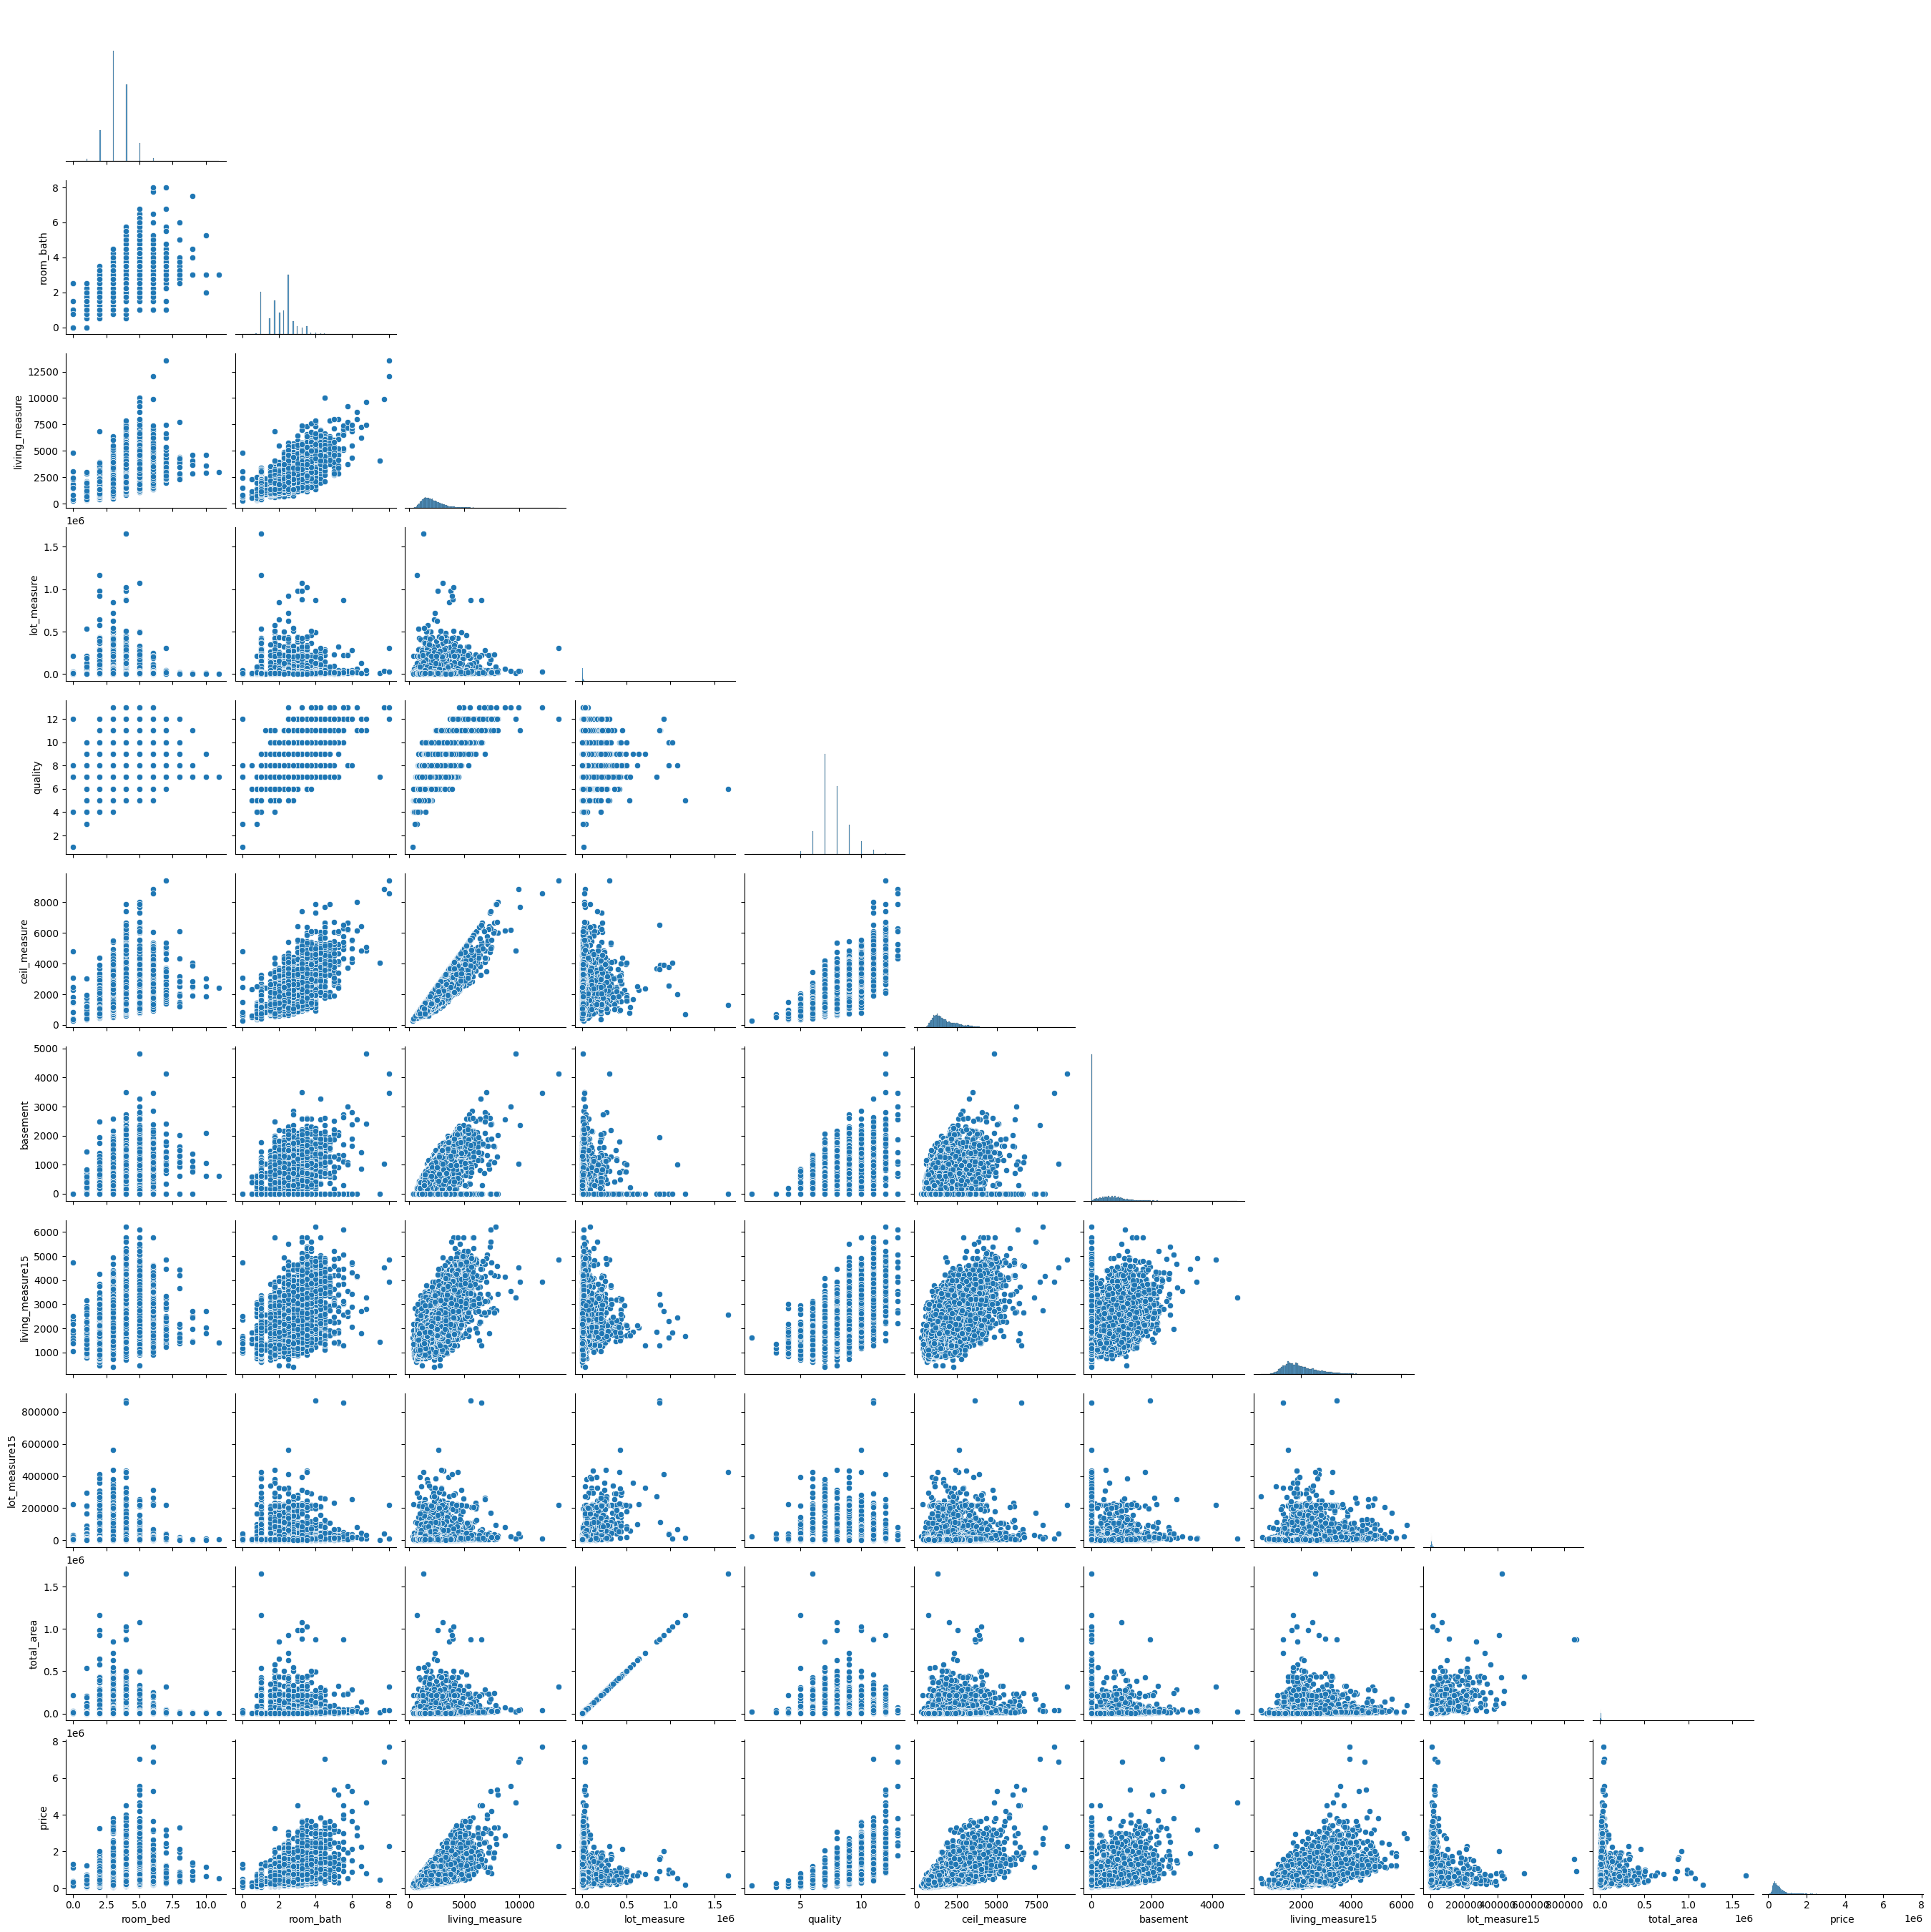

In [ ]:
plt.figure(figsize=(30,25))
sns.pairplot(data=data_num,vars=["room_bed","room_bath","living_measure",
                                 "lot_measure","quality","ceil_measure","basement","living_measure15","lot_measure15","total_area","price"],corner=True)

* Most of the variables in the data set has linear relationship with target variable.

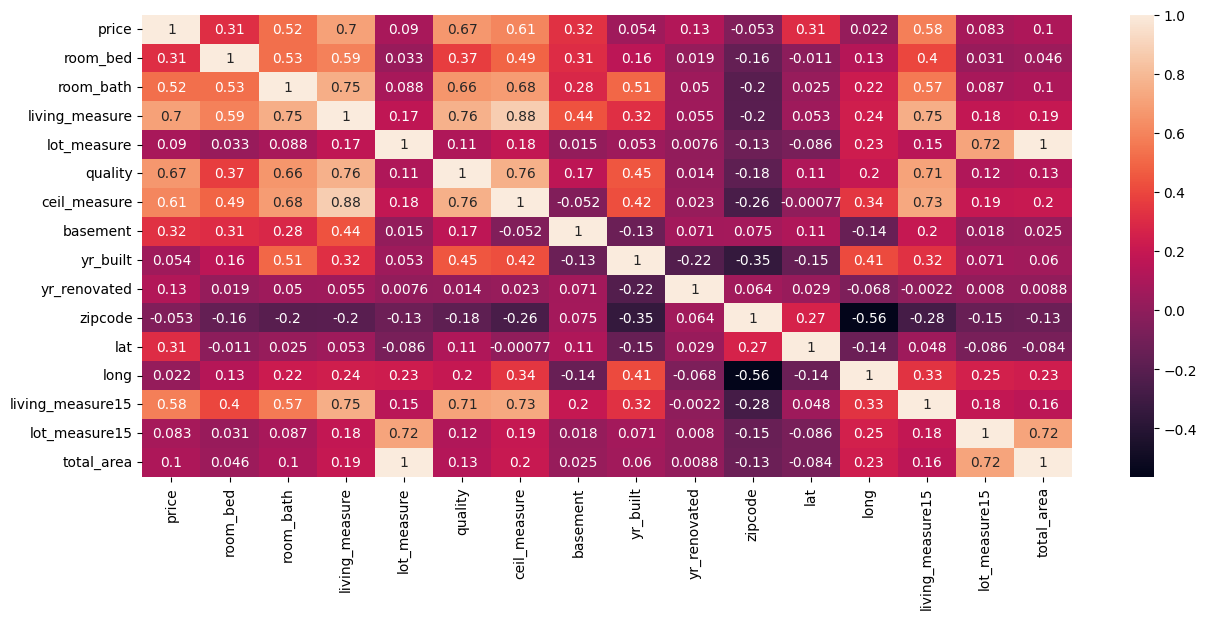

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df.corr(),annot=True,cbar=True);

# Outlier treatment:
* Outliers are identified using 25th quartile, 75th quartile and IQR values.
* IQR=q75-q25
*  lower_range=q25-(IQR*1.5)
*  upper_range=q75+(IQR*1.5)
* By using the above formula upper range and lower range of all the variables are caculated.
* Then the values which are higher range are capped to upper range and values lower than lower range are capped to lower range.



In [ ]:
def treat_outliers(x):
  q25=np.percentile(x,25)
  q75=np.percentile(x,75)
  IQR=q75-q25
  lower_range=q25-(IQR*1.5)
  upper_range=q75+(IQR*1.5)
  return lower_range,upper_range

In [ ]:
feature_list=data_num.columns
for i in feature_list:
  ll,ul=treat_outliers(data_num[i])
  data_num[i]=np.where(data_num[i]>ul,ul,data_num[i])
  data_num[i]=np.where(data_num[i]<ll,ll,data_num[i])

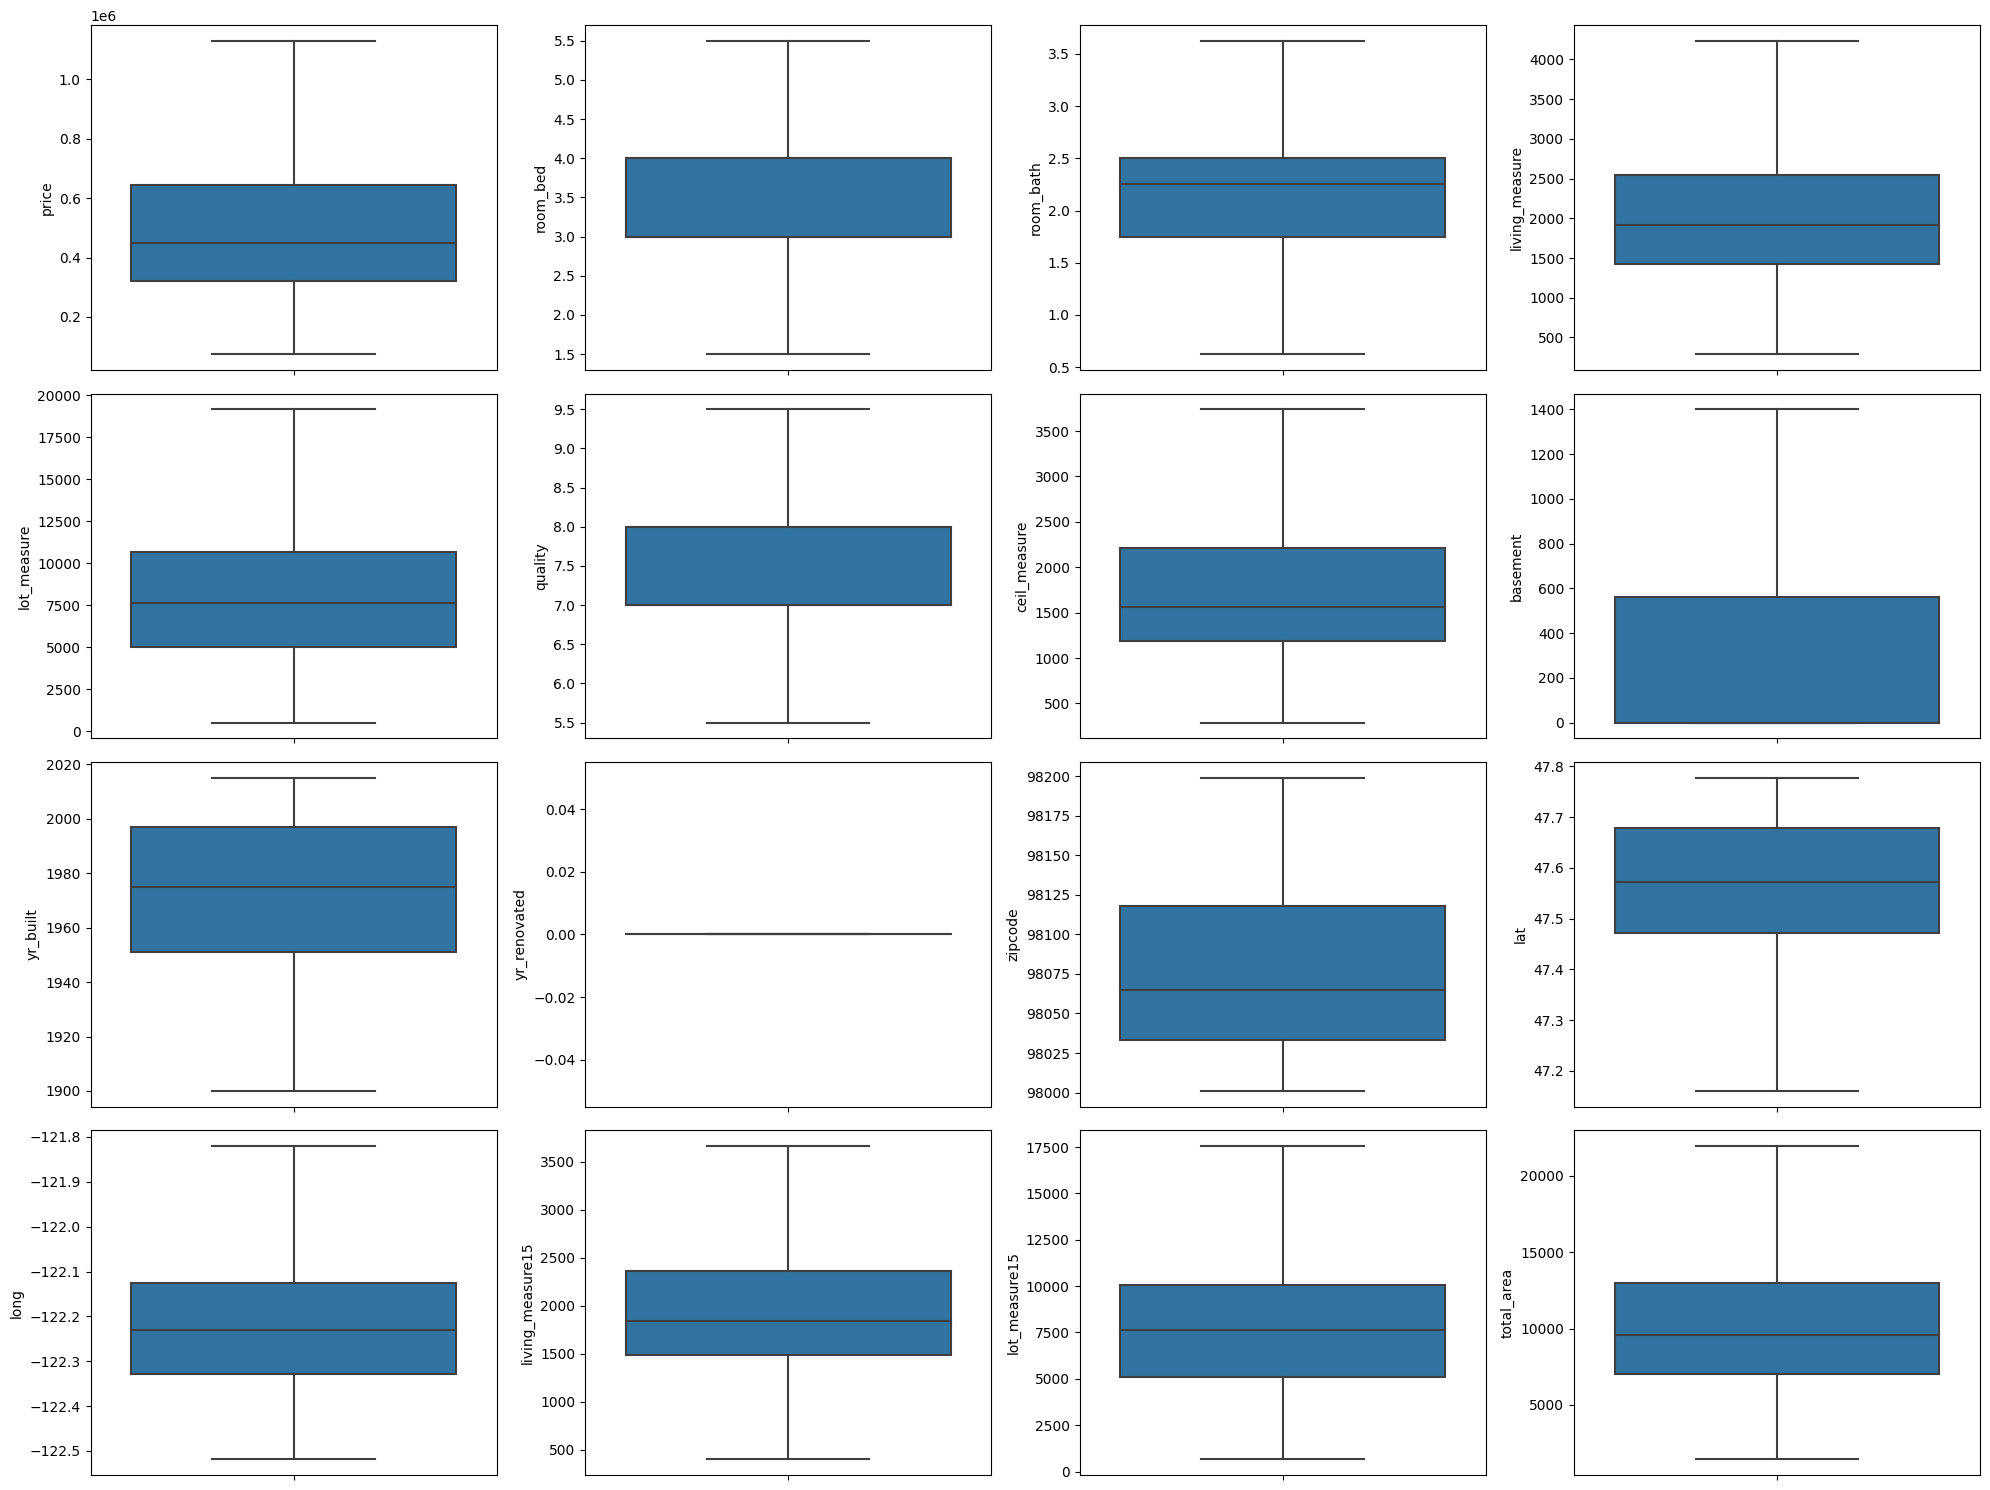

In [ ]:
plt.figure(figsize=(20,15))
for i in range(len(feature_list)):
  plt.subplot(4,4,i+1)
  sns.boxplot(y=data_num[feature_list[i]])
  plt.tight_layout()


In [ ]:
df=pd.concat([data_time,data_num,data_cat],axis=1,join="inner")
df.head()

dayhours     price  room_bed  room_bath  living_measure  lot_measure  \
17176 2014-05-02  435000.0       4.0       1.00          1450.0       8800.0   
16626 2014-05-02  257950.0       3.0       1.75          1370.0       5858.0   
15422 2014-05-02  335000.0       3.0       2.25          1580.0      16215.0   
6337  2014-05-02  445700.0       3.0       2.50          1270.0       1180.0   
13352 2014-05-02  470000.0       5.0       2.50          2210.0       9655.0   

       quality  ceil_measure  basement  yr_built  ...      lat     long  \
17176      7.0        1450.0       0.0    1954.0  ...  47.5746 -122.135   
16626      7.0        1370.0       0.0    1987.0  ...  47.3815 -122.313   
15422      7.0        1580.0       0.0    1978.0  ...  47.5643 -121.897   
6337       8.0        1270.0       0.0    2001.0  ...  47.6697 -122.392   
13352      8.0        1460.0     750.0    1976.0  ...  47.7698 -122.222   

       living_measure15  lot_measure15  total_area  ceil  coast sight  \
17176            1260.0         8942.0     10250.0   1.0    0.0   0.0   
16626            1400.0         7500.0      7228.0   1.0    0.0   0.0   
15422            1450.0        16215.0     17795.0   1.0    0.0   0.0   
6337             1320.0         1180.0      2450.0   3.0    0.0   0.0   
13352            2080.0         8633.0     11865.0   1.0    0.0   0.0   

      condition furnished  
17176       4.0       0.0  
16626       3.0       0.0  
15422       4.0       0.0  
6337        3.0       0.0  
13352       3.0       0.0  

[5 rows x 22 columns]

In [ ]:
plt.figure(figsize=(30,25))
sns.pairplot(data=data_num,vars=["room_bed","room_bath","living_measure",
                                 "lot_measure","quality","ceil_measure","basement","living_measure15","lot_measure15","total_area","price"],corner=True);

Output hidden; open in https://colab.research.google.com to view.

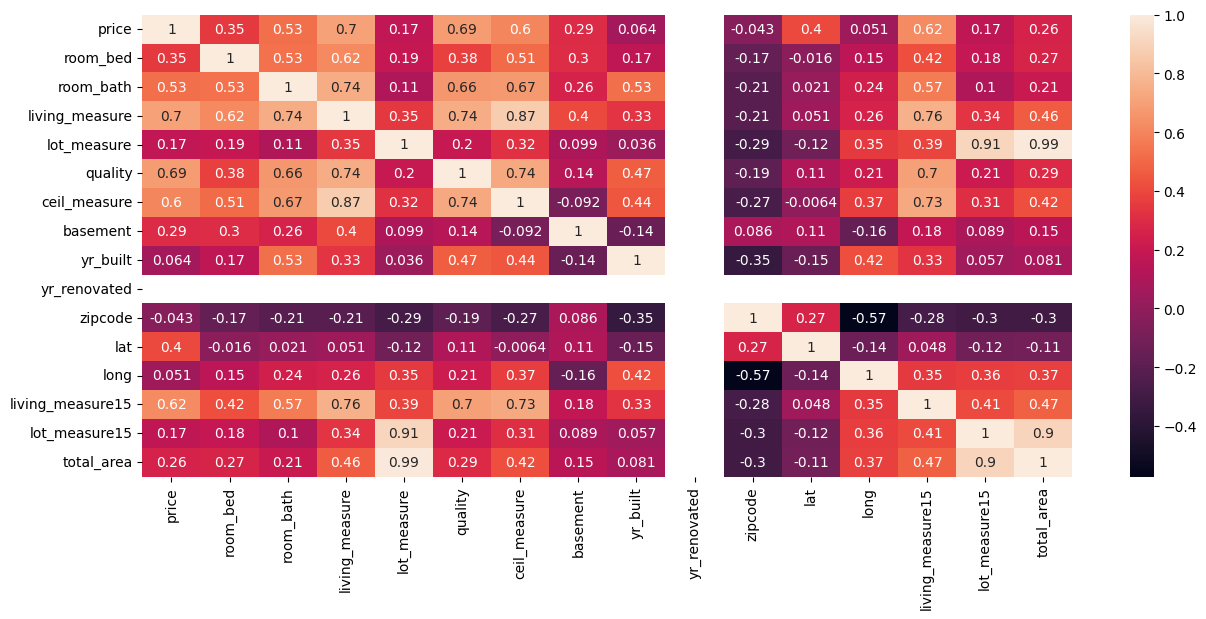

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df.corr(),annot=True,cbar=True);

<Axes: xlabel='ceil', ylabel='price'>

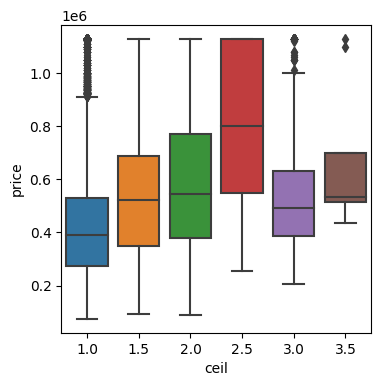

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df["ceil"],y=df["price"])

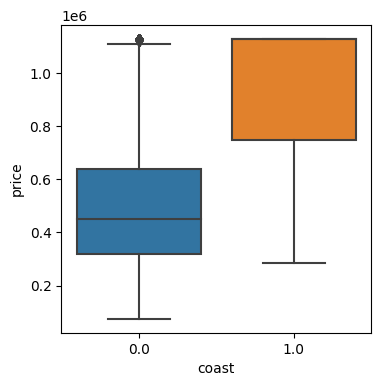

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df["coast"],y=df["price"]);

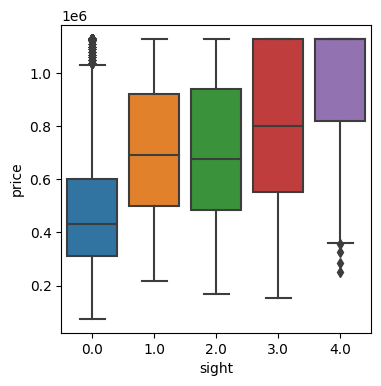

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df["sight"],y=df["price"]);

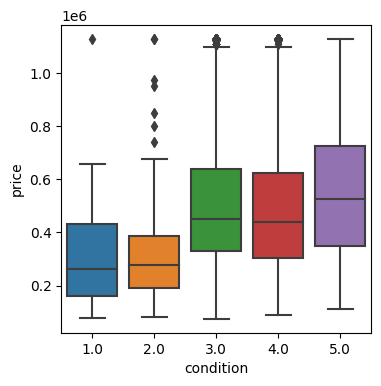

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df["condition"],y=df["price"]);

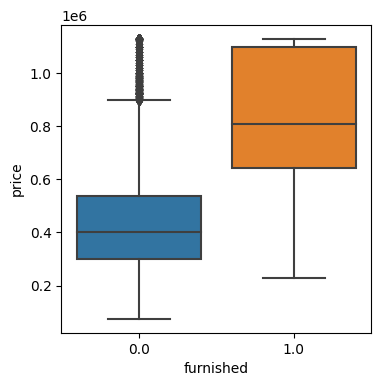

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df["furnished"],y=df["price"]);

# Bivariate analysis:
* living_measure has positive correlation with target variable price, as living_measure value increases the price of the house increases.
* quality has positive correlation with price variable, as the quality grade of the house increases price of the house increases.
* ceil_measure variable has positive correlation with house price, as the sqaure footage of the house apart from basement increases, price of the house increases.
* living_measure15 has positive correlation with house price, as living_measure15 value increases house price also increases.
* room_bath has positive correlation with house price, as the number of bathrooms per bedrooms increases, house price also increases.
* There is much to no correlation between house price and zipcode.
* Houses which have 2.5 as ceil values have high price when compared to all the other ceil values.
* Price of the houses which has view to the waterfront are higher than those houses which has no view to the water front.
*  Houses which are viewed more number of times have high prices.
* Houses which have high overall condition have high prices than those whose condition is not good.
* Furnished houses have higher prices than those which are not furnished.

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
df.drop(["yr_renovated","dayhours"],axis=1,inplace=True)

In [ ]:
df["coast"]=df["coast"].astype("float64")
df["sight"]=df["sight"].astype("int64")
df["condition"]=df["condition"].astype("int64")
df["furnished"]=df["furnished"].astype("int64")
df["ceil"]=df["ceil"].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 17176 to 15121
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   room_bed          21613 non-null  float64
 2   room_bath         21613 non-null  float64
 3   living_measure    21613 non-null  float64
 4   lot_measure       21613 non-null  float64
 5   quality           21613 non-null  float64
 6   ceil_measure      21613 non-null  float64
 7   basement          21613 non-null  float64
 8   yr_built          21613 non-null  float64
 9   zipcode           21613 non-null  float64
 10  lat               21613 non-null  float64
 11  long              21613 non-null  float64
 12  living_measure15  21613 non-null  float64
 13  lot_measure15     21613 non-null  float64
 14  total_area        21613 non-null  float64
 15  ceil              21613 non-null  int64  
 16  coast             21613 non-null  fl

In [ ]:
x=df.drop(["price"],axis=1)
y=df["price"]

In [ ]:
x=sm.add_constant(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_test.head()

const  room_bed  room_bath  living_measure  lot_measure  quality  \
20316    1.0       3.0       2.50          1440.0       1102.0      8.0   
10973    1.0       4.0       2.50          3540.0       7009.0      9.0   
6469     1.0       4.0       2.50          2400.0      11640.0      8.0   
12568    1.0       4.0       3.00          3330.0       4000.0      8.0   
16331    1.0       3.0       1.75          1970.0       7100.0      7.0   

       ceil_measure  basement  yr_built  zipcode      lat     long  \
20316        1440.0       0.0    2009.0  98103.0  47.6995 -122.346   
10973        3540.0       0.0    2007.0  98033.0  47.6749 -122.176   
6469         1800.0     600.0    1968.0  98058.0  47.4485 -122.139   
12568        1790.0    1400.0    1958.0  98103.0  47.6559 -122.230   
16331        1590.0     380.0    1976.0  98072.0  47.7353 -122.172   

       living_measure15  lot_measure15  total_area  ceil  coast  sight  \
20316            1440.0         1434.0      2542.0     3    0.0      0   
10973            2150.0        10290.0     10549.0     2    0.0      0   
6469             2440.0        10823.0     14040.0     1    0.0      0   
12568            1610.0         4000.0      7330.0     1    0.0      0   
16331            1790.0         7455.0      9070.0     1    0.0      0   

       condition  furnished  
20316          3          0  
10973          3          1  
6469           5          0  
12568          3          0  
16331          3          0

In [ ]:
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values of: {}".format(vif_series))

VIF values of: const               4.767693e+06
room_bed            1.785576e+00
room_bath           3.342016e+00
living_measure      7.995832e+01
lot_measure         2.904972e+02
quality             4.617497e+00
ceil_measure        7.078242e+01
basement            1.998952e+01
yr_built            2.384239e+00
zipcode             1.705189e+00
lat                 1.185952e+00
long                1.883045e+00
living_measure15    3.132886e+00
lot_measure15       6.153400e+00
total_area          3.159636e+02
ceil                2.484103e+00
coast               1.225817e+00
sight               1.432757e+00
condition           1.226789e+00
furnished           2.937909e+00
dtype: float64


In [ ]:
olsmod=sm.OLS(y_train,x_train.astype(float))
olsres=olsmod.fit()

In [ ]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2519.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:44:17   Log-Likelihood:            -1.9881e+05
No. Observations:               15129   AIC:                         3.977e+05
Df Residuals:                   15109   BIC:                         3.978e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.505e+05   2.19e+06  

In [ ]:
x_train1=x_train.drop(["total_area"],axis=1)

In [ ]:
vif_series1=pd.Series([variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])],index=x_train1.columns)
print("VIF values of: {}".format(vif_series1))

VIF values of: const               4.765383e+06
room_bed            1.781974e+00
room_bath           3.341712e+00
living_measure      7.977848e+01
lot_measure         6.055015e+00
quality             4.617280e+00
ceil_measure        6.807805e+01
basement            1.906124e+01
yr_built            2.383992e+00
zipcode             1.705040e+00
lat                 1.184069e+00
long                1.879348e+00
living_measure15    3.118413e+00
lot_measure15       6.143883e+00
ceil                2.477742e+00
coast               1.224217e+00
sight               1.431746e+00
condition           1.226081e+00
furnished           2.933538e+00
dtype: float64


In [ ]:
ols_model2=sm.OLS(y_train,x_train1)
olsres1=ols_model2.fit()
print("R-squared:", np.round(olsres1.rsquared,3),"\n Adjusted R- square:",np.round(olsres1.rsquared_adj,3))

R-squared: 0.759 
 Adjusted R- square: 0.759


In [ ]:
x_train2=x_train.drop(["living_measure"],axis=1)

In [ ]:
vif_series2=pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print("VIF values of: {}".format(vif_series2))

VIF values of: const               4.757390e+06
room_bed            1.784048e+00
room_bath           3.308176e+00
lot_measure         2.900071e+02
quality             4.608306e+00
ceil_measure        9.343703e+00
basement            3.341397e+00
yr_built            2.384139e+00
zipcode             1.703540e+00
lat                 1.185740e+00
long                1.882513e+00
living_measure15    3.120869e+00
lot_measure15       6.152690e+00
total_area          3.152530e+02
ceil                2.462859e+00
coast               1.224666e+00
sight               1.431165e+00
condition           1.226200e+00
furnished           2.937446e+00
dtype: float64


In [ ]:
ols_model2=sm.OLS(y_train,x_train2)
olsres2=ols_model2.fit()
print("R-squared:",np.round(olsres2.rsquared,3),"\n Adjusted R-Square:", np.round(olsres2.rsquared_adj,3))

R-squared: 0.757 
 Adjusted R-Square: 0.757


In [ ]:
x_train3=x_train1.drop(["living_measure"],axis=1)

In [ ]:
vif_series3=pd.Series([variance_inflation_factor(x_train3.values,i) for i in range(x_train3.shape[1])],index=x_train3.columns)
print("VIF values: {}".format(vif_series3))

VIF values: const               4.755516e+06
room_bed            1.780212e+00
room_bath           3.307490e+00
lot_measure         6.045038e+00
quality             4.608202e+00
ceil_measure        5.269357e+00
basement            1.999781e+00
yr_built            2.383907e+00
zipcode             1.703339e+00
lat                 1.183912e+00
long                1.878941e+00
living_measure15    3.105082e+00
lot_measure15       6.142903e+00
ceil                2.457540e+00
coast               1.222931e+00
sight               1.430269e+00
condition           1.225549e+00
furnished           2.933199e+00
dtype: float64


In [ ]:
ols_model3=sm.OLS(y_train,x_train3)
olsres3=ols_model3.fit()
print("R-sqaured:",np.round(olsres3.rsquared,3),"\nAdjusted r square:", np.round(olsres3.rsquared_adj,3))


R-sqaured: 0.756 
Adjusted r square: 0.756


In [ ]:
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     2757.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:44:56   Log-Likelihood:            -1.9893e+05
No. Observations:               15129   AIC:                         3.979e+05
Df Residuals:                   15111   BIC:                         3.980e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.305e+05    2.2e+06  

In [ ]:
x_train4=x_train.drop(["total_area","living_measure","lot_measure"],axis=1)

In [ ]:
vif_series4=pd.Series([variance_inflation_factor(x_train4.values,i) for i in range(x_train4.shape[1])],index=x_train4.columns)
print("VIF values:{}".format(vif_series4))

VIF values:const               4.743582e+06
room_bed            1.780083e+00
room_bath           3.307179e+00
quality             4.607839e+00
ceil_measure        5.188873e+00
basement            1.992559e+00
yr_built            2.376649e+00
zipcode             1.703086e+00
lat                 1.182630e+00
long                1.874140e+00
living_measure15    3.102164e+00
lot_measure15       1.613124e+00
ceil                2.442598e+00
coast               1.222873e+00
sight               1.430095e+00
condition           1.224443e+00
furnished           2.932343e+00
dtype: float64


In [ ]:
ols_model4=sm.OLS(y_train,x_train4)
ols_res4=ols_model4.fit()
print("R-Squared:",np.round(ols_res4.rsquared,3),"Adjusted R squared:",np.round(ols_res4.rsquared_adj,3))

R-Squared: 0.756 Adjusted R squared: 0.756


In [ ]:
print(ols_res4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     2929.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:45:04   Log-Likelihood:            -1.9893e+05
No. Observations:               15129   AIC:                         3.979e+05
Df Residuals:                   15112   BIC:                         3.980e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.643e+05    2.2e+06  

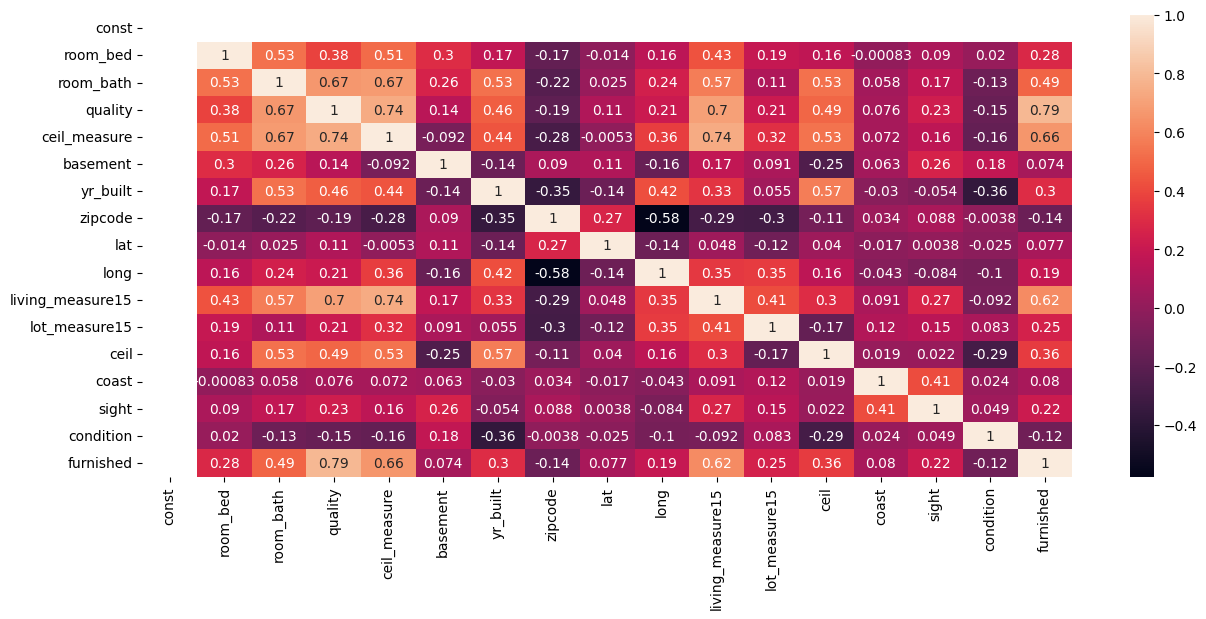

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data=x_train4.corr(),annot=True,cbar=True);

In [ ]:
x_train5=x_train4.drop(["room_bath"],axis=1)

In [ ]:
vif_series5=pd.Series([variance_inflation_factor(x_train5.values,i) for i in range(x_train5.shape[1])],index=x_train5.columns)
print("VIF values: {}".format(vif_series5))

VIF values: const               4.741801e+06
room_bed            1.718878e+00
quality             4.524807e+00
ceil_measure        4.702700e+00
basement            1.665942e+00
yr_built            2.202146e+00
zipcode             1.701534e+00
lat                 1.182560e+00
long                1.874136e+00
living_measure15    3.102161e+00
lot_measure15       1.593801e+00
ceil                2.323396e+00
coast               1.222432e+00
sight               1.429501e+00
condition           1.221354e+00
furnished           2.913418e+00
dtype: float64


In [ ]:
ols_model5=sm.OLS(y_train,x_train5)
ols_res5=ols_model5.fit()
print("R-squared:",np.round(ols_res5.rsquared,3),"Adjusted R Squared:",np.round(ols_res5.rsquared_adj,3))

R-squared: 0.753 Adjusted R Squared: 0.753


In [ ]:
x_train6=x_train5.drop(["quality"],axis=1)

In [ ]:
vif_series6=pd.Series([variance_inflation_factor(x_train6.values,i) for i in range(x_train6.shape[1])],index=x_train6.columns)
print("VIF values: {}".format(vif_series6))

VIF values: const               4.731941e+06
room_bed            1.718173e+00
ceil_measure        4.437299e+00
basement            1.593076e+00
yr_built            2.049949e+00
zipcode             1.696155e+00
lat                 1.157592e+00
long                1.839450e+00
living_measure15    2.986611e+00
lot_measure15       1.591431e+00
ceil                2.282899e+00
coast               1.222290e+00
sight               1.426372e+00
condition           1.219182e+00
furnished           2.021537e+00
dtype: float64


In [ ]:
ols_model6=sm.OLS(y_train,x_train6)
ols_res6=ols_model6.fit()
print("R-squared:",np.round(ols_res6.rsquared,3),"Adjusted R Squared:",np.round(ols_res6.rsquared_adj,3))

R-squared: 0.734 Adjusted R Squared: 0.734


In [ ]:
x_train7=x_train6.drop(["ceil_measure"],axis=1)

In [ ]:
vif_series7=pd.Series([variance_inflation_factor(x_train7.values,i) for i in range(x_train7.shape[1])],index=x_train7.columns)
print("VIF values: {}".format(vif_series7))

VIF values: const               4.729532e+06
room_bed            1.365433e+00
basement            1.413243e+00
yr_built            2.049928e+00
zipcode             1.695478e+00
lat                 1.157122e+00
long                1.828962e+00
living_measure15    2.378020e+00
lot_measure15       1.556165e+00
ceil                2.007013e+00
coast               1.221536e+00
sight               1.425649e+00
condition           1.219182e+00
furnished           1.762884e+00
dtype: float64


In [ ]:
ols_model7=sm.OLS(y_train,x_train7)
ols_res7=ols_model7.fit()
print("R-squared:",np.round(ols_res7.rsquared,3),"Adjusted R Squared:",np.round(ols_res7.rsquared_adj,3))

R-squared: 0.695 Adjusted R Squared: 0.695


In [ ]:
print(ols_res7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2653.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:10:09   Log-Likelihood:            -2.0061e+05
No. Observations:               15129   AIC:                         4.013e+05
Df Residuals:                   15115   BIC:                         4.014e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.541e+05   2.46e+06  

In [ ]:
df_pred=pd.DataFrame()

In [ ]:
df_pred["Actual values"]=y_train.values.flatten()
df_pred["Fitted values"]=ols_res7.fittedvalues.values
df_pred["Residuals"]=ols_res7.resid.values
df_pred.head()

Actual values  Fitted values      Residuals
0       584000.0  427457.586499  156542.413501
1       395000.0  462162.751392  -67162.751392
2       515000.0  449192.724026   65807.275974
3       330000.0  401805.740841  -71805.740841
4       379000.0  412489.351156  -33489.351156

<Axes: xlabel='Fitted values', ylabel='Residuals'>

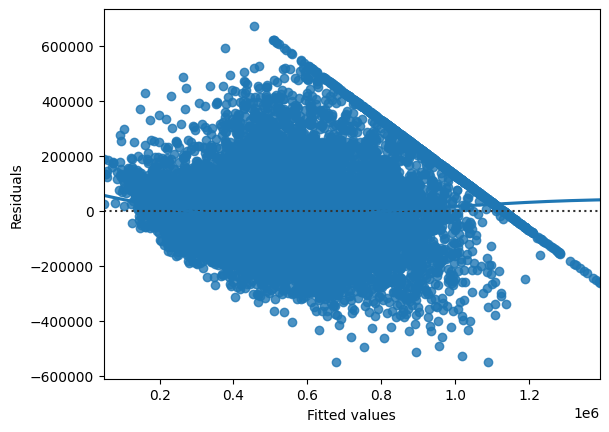

In [ ]:
sns.residplot(data=df_pred,x="Fitted values",y="Residuals",lowess=True)

<Axes: xlabel='Residuals', ylabel='Density'>

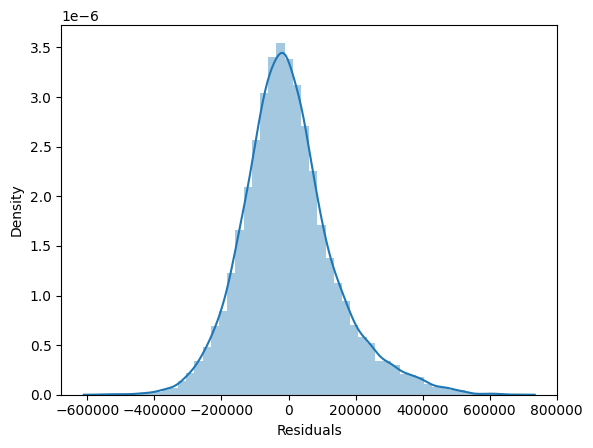

In [ ]:
sns.distplot(df_pred["Residuals"],kde=True)

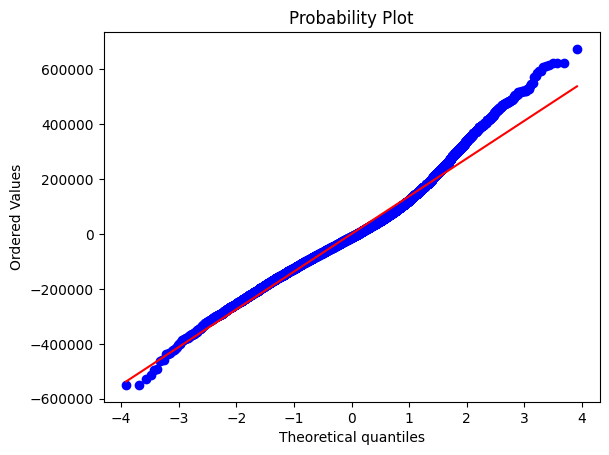

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show()

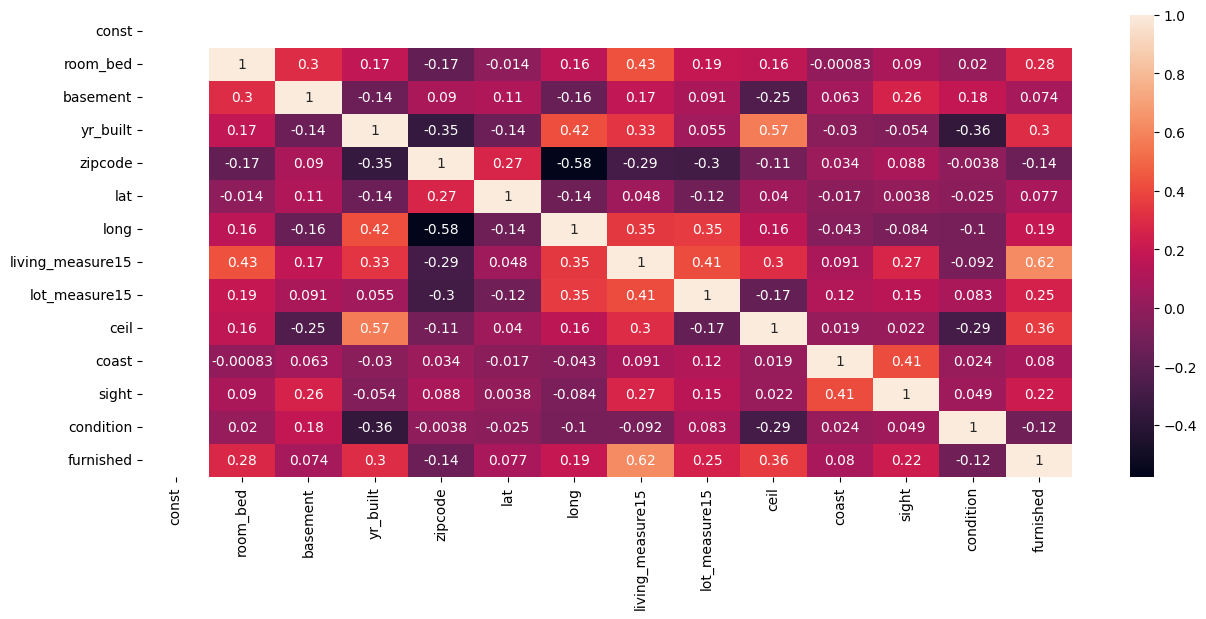

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data=x_train7.corr(),annot=True,cbar=True);

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name=["F-statistic","p-value"]
test=sms.het_goldfeldquandt(df_pred["Residuals"],x_train7)
lzip(name,test)

[('F-statistic', 0.9867317829248128), ('p-value', 0.7191432199928196)]

In [ ]:
x_train7.columns

Index(['const', 'room_bed', 'basement', 'yr_built', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'ceil', 'coast', 'sight',
       'condition', 'furnished'],
      dtype='object')

In [ ]:
x_test.columns

Index(['const', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'quality', 'ceil_measure', 'basement', 'yr_built', 'zipcode', 'lat',
       'long', 'living_measure15', 'lot_measure15', 'total_area', 'ceil',
       'coast', 'sight', 'condition', 'furnished'],
      dtype='object')

In [ ]:
x_test1=x_test.drop(["room_bath","living_measure","lot_measure","quality","ceil_measure","total_area"],axis=1)

In [ ]:
x_test1.columns

Index(['const', 'room_bed', 'basement', 'yr_built', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'ceil', 'coast', 'sight',
       'condition', 'furnished'],
      dtype='object')

In [ ]:
y_pred=ols_res7.predict(x_test1)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse=np.sqrt(mean_squared_error(y_train,df_pred["Fitted values"]))
rmse

138859.9821683922

In [ ]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1

138864.8669552525

In [ ]:
mae_train=mean_squared_error(y_train,df_pred["Fitted values"])
mae_train

19282094647.806194

In [ ]:
mae_test=mean_squared_error(y_test,y_pred)
mae_test

19283451274.499977